
<style>
@import url('https://fonts.googleapis.com/css?family=Raleway:200');

.gradient-containe {
  display: flex;
  justify-content: center;
  align-items: center;
  height: 100%;
  background: #1D1F20;
}
#box {
  display: flex;
  align-items: center;
  justify-content: center;
  height: 200px;
  color: white;
  font-family: 'Raleway';
  font-size: 2.5rem;
}
.gradient-border {
  --borderWidth: 6px;
  background: #1D1F20;
  position: relative;
  border-radius: var(--borderWidth);
}
.gradient-border:after {
  content: '';
  position: absolute;
  top: calc(-1 * var(--borderWidth));
  left: calc(-1 * var(--borderWidth));
  height: calc(100% + var(--borderWidth) * 2);
  width: calc(100% + var(--borderWidth) * 2);
  background: linear-gradient(60deg, #f79533, #f37055, #ef4e7b, #a166ab, #5073b8, #1098ad, #07b39b, #6fba82);
  border-radius: calc(2 * var(--borderWidth));
  z-index: -1;
  animation: animatedgradient 2s ease alternate infinite;
  background-size: 300% 300%;
}


@keyframes animatedgradient {
	0% {
		background-position: 0% 50%;
	}
	50% {
		background-position: 100% 50%;
	}
	100% {
		background-position: 0% 50%;
	}
}




</style>
<div class="gradient-container">
<div class="gradient-border" id="box">The World's <br>Greatest<br>Rolling Tutorial</div>

In [80]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"
pio.renderers.default = "svg"
samples_per_day = 6
base_date_index = pd.date_range("2021-01-01", "2021-01-31", freq="D")
base_date_index


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', freq='D')

In [81]:
date_index = base_date_index.tolist() * samples_per_day
date_index.sort()
date_index[:11]


[Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D')]

In [82]:
categories = ["A", "A", "A", "B", "B", "C"] * 31


In [83]:
data = pd.DataFrame([1] * samples_per_day * 31, columns=["metric"]).assign(
    categories=categories,
    date=date_index,
)
print(data.shape)
data.head(11)


(186, 3)


,metric,categories,date
0,1,A,2021-01-01
1,1,A,2021-01-01
2,1,A,2021-01-01
3,1,B,2021-01-01
4,1,B,2021-01-01
5,1,C,2021-01-01
6,1,A,2021-01-02
7,1,A,2021-01-02
8,1,A,2021-01-02
9,1,B,2021-01-02


In [86]:
_ = data.groupby("categories", as_index=False).rolling("7D", on="date").sum()
_.head()


,categories,metric,date
0,A,1.0,2021-01-01
1,A,2.0,2021-01-01
2,A,3.0,2021-01-01
6,A,4.0,2021-01-02
7,A,5.0,2021-01-02


For each group in the groupby, and for each window defined by rolling, pandas will roll sum all values inside of it.

2021-01-01 : 2021-01-07 is one window,

2021-01-02 : 2021-01-08 is another window...


However, it will **not** use the date as index, it will use the original index instead. If we have duplicated dates, we will have a problem.

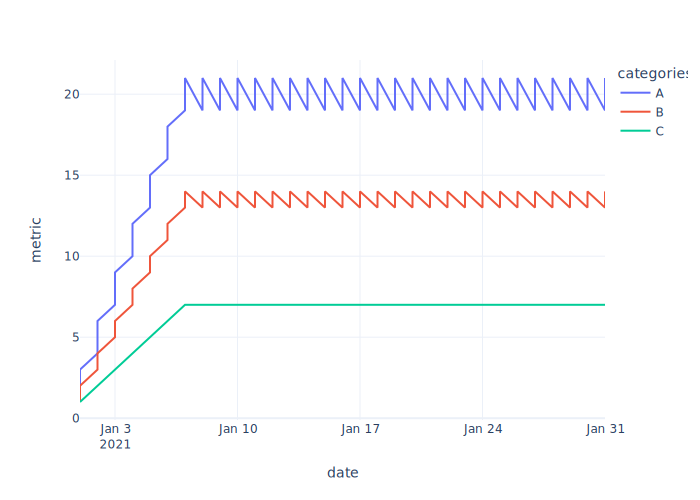

In [87]:
px.line(_, x="date", y="metric", color="categories")


Thats not what we wanted...

![](https://media.tenor.com/PqgTNvSN8wIAAAAC/kermit-worried.gif)

`%xmode` controls the verbosity level for exceptions.

In [89]:
%xmode  minimal

Exception reporting mode: Minimal


In [90]:
data.groupby(["categories", "date"], as_index=False).sum().groupby(
    "categories", as_index=False
).rolling("7D", on="date").sum().head()


ValueError: date must be monotonic

In [91]:
_ = data.groupby(["categories", "date"], as_index=False).sum().sort_values("date").groupby(
    "categories", as_index=False
).rolling("7D", on="date").sum()
_.head()

,categories,date,metric
0,A,2021-01-01,3.0
1,A,2021-01-02,6.0
2,A,2021-01-03,9.0
3,A,2021-01-04,12.0
4,A,2021-01-05,15.0


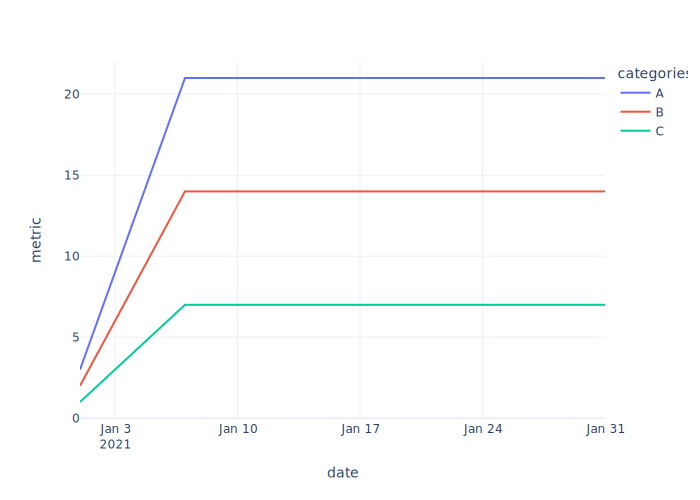

In [92]:
px.line(_, x="date", y="metric", color="categories")


![](https://media.tenor.com/GbXkvOfGQjEAAAAi/yay-kitty.gif)
